The business problem is about a company who sells office products to large organizations.
Goal is to answer the following questions:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would is recommended to continue using?
- Other findings

Also, recommend business metrics and further actions.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('product_sales.csv')
df = pd.DataFrame(df)
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
df.shape

(15000, 8)

In [7]:
#df.isnull().head().drop_duplicates()

df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [8]:
df['sales_method'] = df['sales_method'].str.capitalize()
df['sales_method'] = df['sales_method'].replace('Em + call', 'Email + call')
df.sales_method.unique()

array(['Email', 'Email + call', 'Call'], dtype=object)

In [9]:
print(df['customer_id'].duplicated().unique(),
df['customer_id'].isnull().unique())

[False] [False]


In [10]:
print(df['nb_sold'].describe())
print(df['nb_sold'].isnull().unique())

count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64
[False]


In [11]:
print(df['revenue'].describe())
print(df['revenue'].isnull().unique())

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64
[ True False]


In [12]:
df = df.dropna(subset = ['revenue'])
df.shape

(13926, 8)

In [13]:
print('N° of customers above 39 years:', df[df['years_as_customer']>39]['years_as_customer'].count())

df = df[df['years_as_customer']<=39]
print('Shape after cleaning years_as_customer:', df.shape)


N° of customers above 39 years: 2
Shape after cleaning years_as_customer: (13924, 8)


In [14]:
df[['years_as_customer','nb_site_visits']].describe()

,years_as_customer,nb_site_visits
count,13924.000000,13924.000000
mean,4.971775,24.946926
std,5.011542,3.491690
min,0.000000,12.000000
25%,1.000000,23.000000
50%,3.000000,25.000000
75%,7.000000,27.000000
max,39.000000,37.000000


In [15]:
df['state'].unique()

array(['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
       'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
       'Maryland', 'California', 'Tennessee', 'North Dakota', 'Florida',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Indiana', 'Hawaii',
       'Colorado', 'Louisiana', 'Virginia', 'Arkansas', 'Alaska',
       'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
       'Iowa', 'Montana', 'Washington', 'Arizona', 'Kentucky', 'Alabama',
       'Nebraska', 'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
       'Utah', 'West Virginia', 'Vermont', 'New Mexico', 'Rhode Island',
       'Nevada', 'Delaware', 'Idaho', 'Wyoming'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB


In [17]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


## Data Validation

Dataset contains 15.000 rows and 8 columns, before cleaning and validation.

- week: No missing values, numeric values between 1 and 6 weeks. No cleaning needed.
- sales_method: Misstyped values were found and fixed (ex: 'em + call' replaced to 'Email + call'), also  all values were capitalized. No data missing.
- customer_id: No duplicated values found. No cleaning needed.
- nb_ sold: No missing values, numeric values between 7 and 16. No cleaning needed. 
- revenue: Contains 1.074 missing values. Due it's not possible to have sold products and 0 revenue, we dropped them. Numeric values.
- years_as_customer: Company was founded on 1984, so no customer can be older than 39 years. 2 values found above 39 years, we dropped them. Numeric values.
- nb_site_visits: numeric values, no missing data. No cleaning needed.
- state: 50 different character values. No cleaning needed.

Ater the validation of the dataset, it contains 13.924 rows and 8 columns without missing values.

## How many customers were there for each approach?
The most used sales method was the email, with almost 7.000 customers, followed by Calls with 4.800 customers, and lastly by Email + Call, with 2.200 customers.

              customer_id
sales_method             
Call                 4780
Email                6921
Email + call         2223


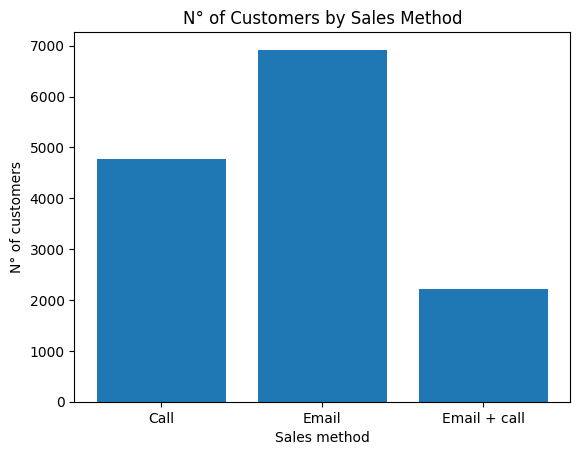

In [18]:
#How many customers were there for each approach?

cust_per_approach = df.groupby('sales_method')[['customer_id']].count()

#print(cust_per_approach)

x = cust_per_approach.index
y = cust_per_approach['customer_id']

plt.bar(x,y)
plt.ylabel('N° of customers')
plt.xlabel('Sales method')
plt.title('N° of Customers by Sales Method')
plt.show()


## What does the spread of the revenue look like?
The spread of revenue is very varied, but we can identify two big groups of revenue, between the ranges 25-60 and more in usd 70-120 USD, and a smallest one in the range 160-190 usd.

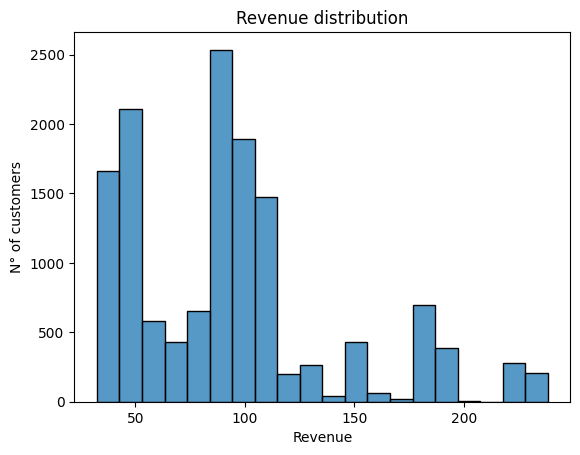

In [19]:
#What does the spread of the revenue look like overall?

sns.histplot(data = df , x = 'revenue', bins = 20)
plt.ylabel('N° of customers')
plt.xlabel('Revenue')
plt.title('Revenue distribution')
plt.show()

These groups are explained by the method used for the sales. These methods almost don't overlap each other, except on the 125 usd zone, but making the revenue groups identifiable in the graph below.

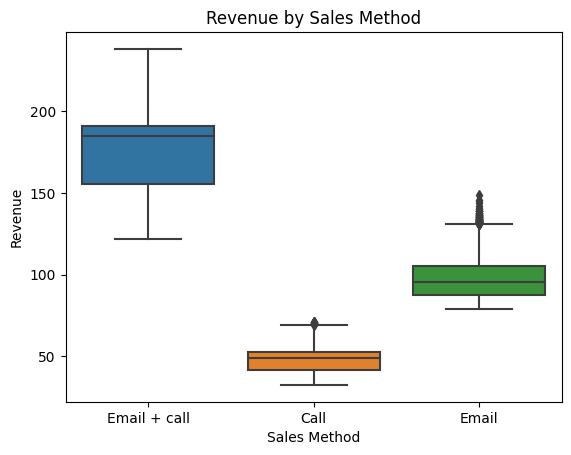

In [20]:
#And for each method?

sns.boxplot(data = df , x= 'sales_method', y = 'revenue')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue by Sales Method')
plt.show()

We don't have register of the price of each product sold to each customer, but the ratio of revenue over number of new products sold shows below clear groups of possible price ranges of the products.

This suggest that probably the most expensive products were sold by Email + Call method, and by Email only the mild-expensive products. This should be validated with further information about the product prices.

<AxesSubplot: xlabel='rev/nsold', ylabel='Count'>

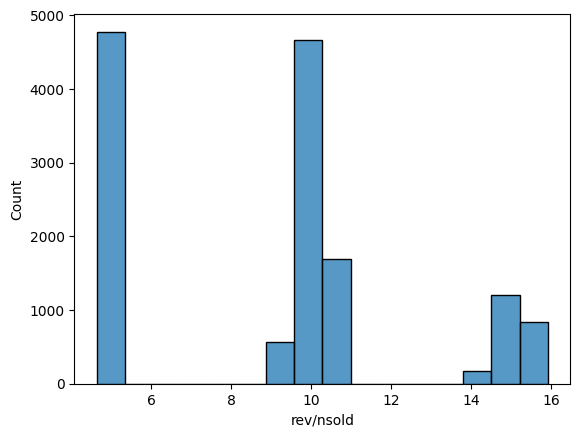

In [21]:
df['rev/nsold'] = df['revenue']/df['nb_sold']

sns.histplot(df['rev/nsold'], bins= 16)

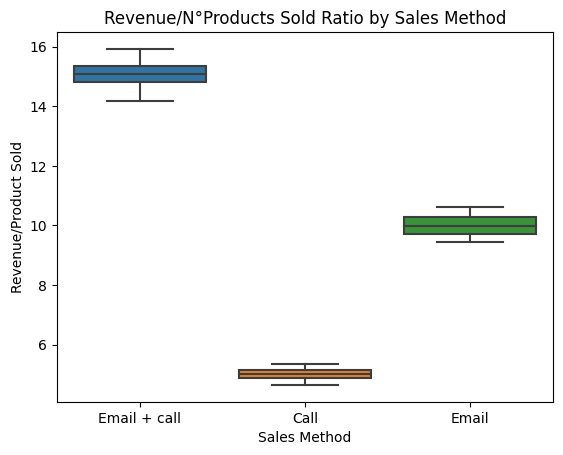

In [22]:
df['rev/nsold'] = df['revenue']/df['nb_sold']

sns.boxplot(data = df , x= 'sales_method', y = 'rev/nsold')
plt.xlabel('Sales Method')
plt.ylabel('Revenue/Product Sold')
plt.title('Revenue/N°Products Sold Ratio by Sales Method')
plt.show()

## Was there any difference in revenue over time for each of the methods?

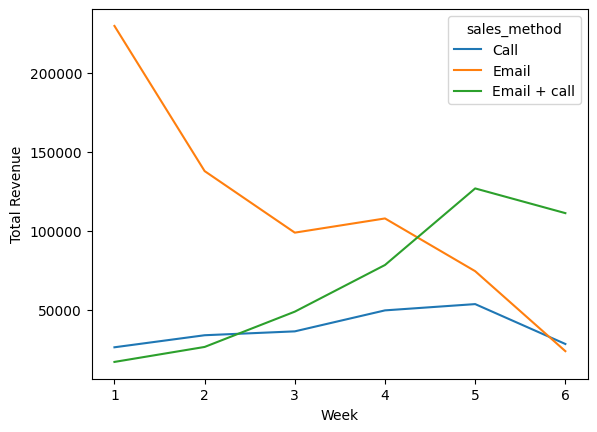

In [23]:
#Was there any difference in revenue over time for each of the methods?

rev_over_time = df.groupby(['week','sales_method'])['revenue'].sum()

rev_over_time = pd.DataFrame(rev_over_time)
rev_over_time.reset_index()


sns.lineplot(data = rev_over_time , x='week', y = 'revenue', hue = 'sales_method')
plt.ylabel('Total Revenue')
plt.xlabel('Week')
plt.show()

Email only method are very successful at first instance, but will decay over time. Although the second mail sent helped to sustain revenues for a week, they don't seem to be enough to reverse the trend.

While the Email + Call method starts with the lowest performance, it sustains an increasing trend, with a call at 3rd week that helps to boost the revenues.

The Call method have sustained revenues over the time, but low. Being the Call method the one who requires lot of efforts, we should question if it worth.

To evaluate the performance of each sales method in relation to their effort, based in the information provided, we assigned a time effort value to each method:
-  30 min to Call only
-  10 min to Email + Call
-  1 min to Email only

Then we calculate the ratio between revenue and time.

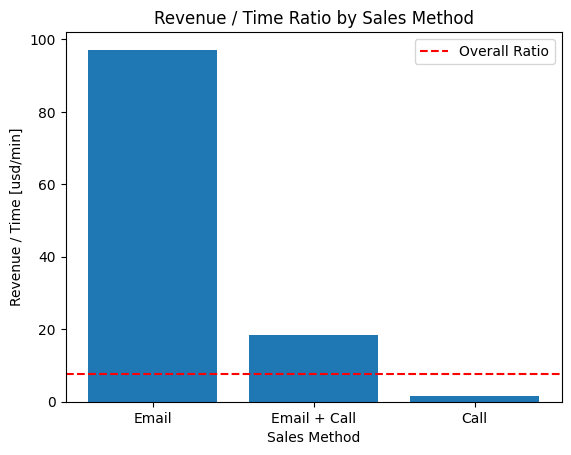

In [24]:
#Calculating Total Revenue, and Total Minutes invested on sales methods

df.loc[df['sales_method'] == 'Email', 'Minutes'] = 1
df.loc[df['sales_method'] == 'Email + call', 'Minutes'] = 10
df.loc[df['sales_method'] == 'Call', 'Minutes'] = 30

tsum_rev = df['revenue'].sum().round(2)
tsum_min = df['Minutes'].sum()
t_rev_min = (tsum_rev/tsum_min).round(2)

esum_rev = df[df['sales_method']=='Email']['revenue'].sum().round(2)
esum_min = df[df['sales_method']=='Email']['Minutes'].sum()
e_rev_min = (esum_rev/esum_min).round(2)

ecsum_rev = df[df['sales_method']=='Email + call']['revenue'].sum().round(2)
ecsum_min = df[df['sales_method']=='Email + call']['Minutes'].sum()
ec_rev_min = (ecsum_rev/ecsum_min).round(2)

csum_rev = df[df['sales_method']=='Call']['revenue'].sum().round(2)
csum_min = df[df['sales_method']=='Call']['Minutes'].sum()
c_rev_min = (csum_rev/csum_min).round(2)

#print('Email')
#print('Total: ',esum_rev ,'usd | Minutes :', esum_min,'min | Ratio: ' , (esum_rev/esum_min).round(2), 'usd/min')

#print('Email + call')
#print('Total: ',ecsum_rev ,'usd | Minutes :', ecsum_min,'min | Ratio: ' , (ecsum_rev/ecsum_min).round(2), 'usd/min')

#print('Call')
#print('Total: ',csum_rev ,'usd | Minutes :', csum_min,'min | Ratio: ' , (csum_rev/csum_min).round(2), 'usd/min')

#Revenue/Minutes Ratio - The higher the better.

#print('Overall Total')
#print('Total: ',tsum_rev ,'usd | Minutes :', tsum_min,'min | Ratio: ' , (tsum_rev/tsum_min).round(2), 'usd/min')

x = ['Email','Email + Call','Call']
y=[e_rev_min,ec_rev_min,c_rev_min]
plt.axhline(y = t_rev_min, color = 'red', linestyle = '--', label = 'Overall Ratio')
plt.legend()
plt.bar(x,y)
plt.xlabel('Sales Method')
plt.ylabel('Revenue / Time [usd/min]')
plt.title('Revenue / Time Ratio by Sales Method')
plt.show()


Email is the most dominant profitable strategy (97.13 USD/min), followed by Email + call (18.37 USD/min), and finally a low ratio of Call only method (1.59 USD/min).  
Overall ratio is 7.58 USD/min (dashed red line), this mean value is highly skewed due the Call method.

<AxesSubplot: xlabel='week', ylabel='nb_site_visits'>

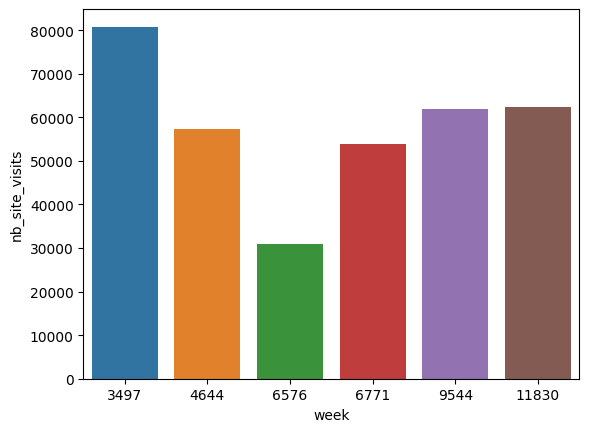

In [25]:
asd = df.groupby('week')[['week','nb_site_visits']].sum()
asd

sns.barplot(data = asd, x='week', y='nb_site_visits')

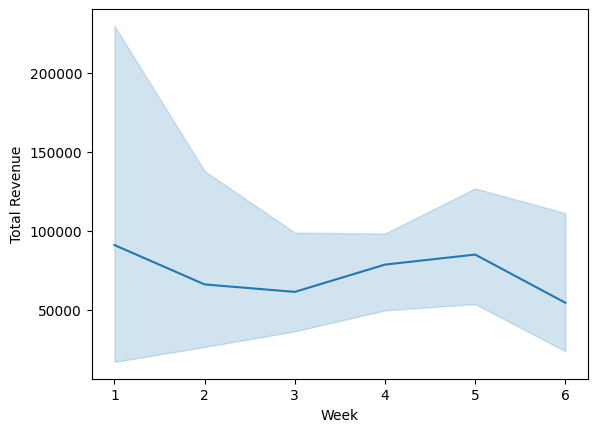

In [26]:
sns.lineplot(data = rev_over_time , x='week', y = 'revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Week')
plt.show()

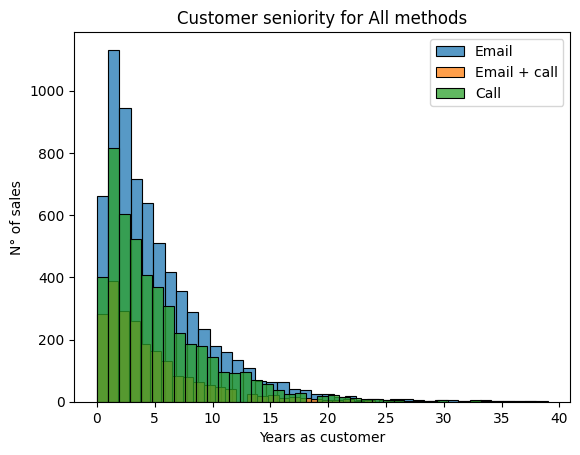

In [27]:
sns.histplot(data = df[df['sales_method'] == 'Email'] , x = 'years_as_customer', bins = 40, label = 'Email')
plt.ylabel('N° of sales')
plt.xlabel('Years as customer')
plt.title('Customer seniority for Email method')
#plt.show()

sns.histplot(data = df[df['sales_method'] == 'Email + call'] , x = 'years_as_customer', bins = 40, label = 'Email + call')
plt.ylabel('N° of sales')
plt.xlabel('Years as customer')
plt.title('Customer seniority for Email+call method')
#plt.show()

sns.histplot(data = df[df['sales_method'] == 'Call'] , x = 'years_as_customer', bins = 40, label = 'Call')
plt.ylabel('N° of sales')
plt.xlabel('Years as customer')
#plt.title('Customer seniority for Call method')
plt.title('Customer seniority for All methods')
plt.legend()
plt.show()

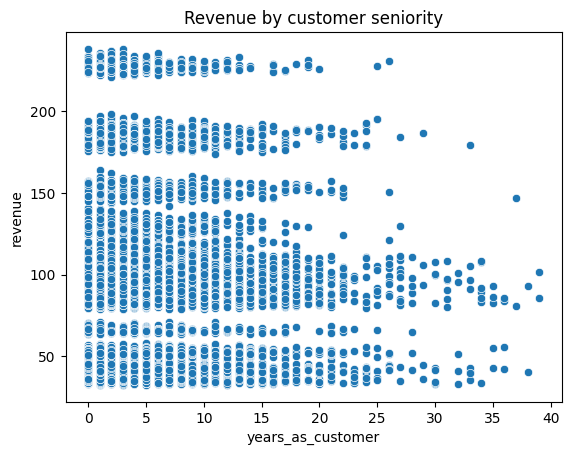

In [28]:
sns.scatterplot(data = df , y= 'revenue', x = 'years_as_customer')
plt.title('Revenue by customer seniority')
plt.show()

### Other customer details findings:

Those customers who visited the most our website yielded more revenue. So the website should be promoted in order to increase the revenues.

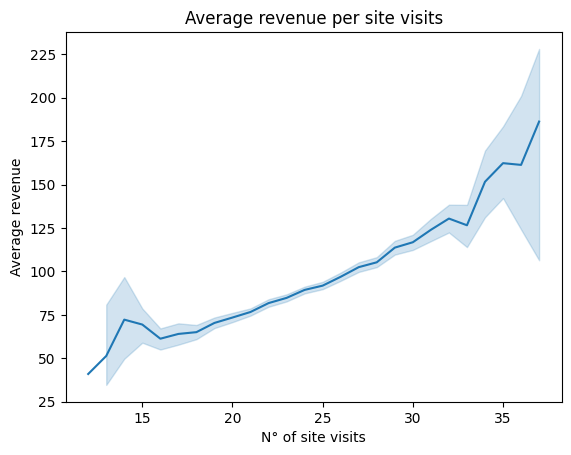

In [29]:
sns.lineplot(data = df , y= 'revenue', x = 'nb_site_visits')
plt.xlabel('N° of site visits')
plt.ylabel('Average revenue')
plt.title('Average revenue per site visits')
plt.show()

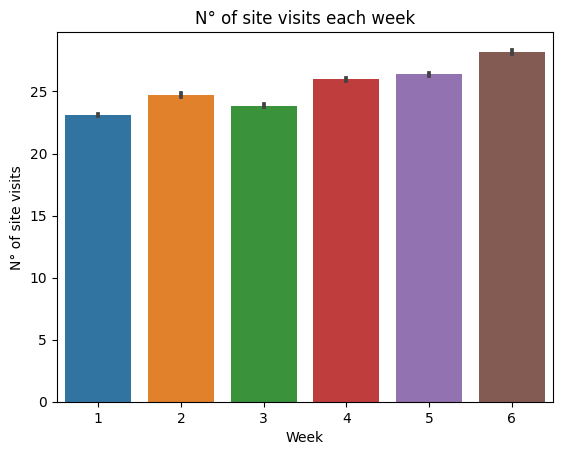

In [30]:
sns.barplot(data = df , y= 'nb_site_visits', x = 'week')
plt.xlabel('Week')
plt.ylabel('N° of site visits')
plt.title('N° of site visits each week')
plt.show()

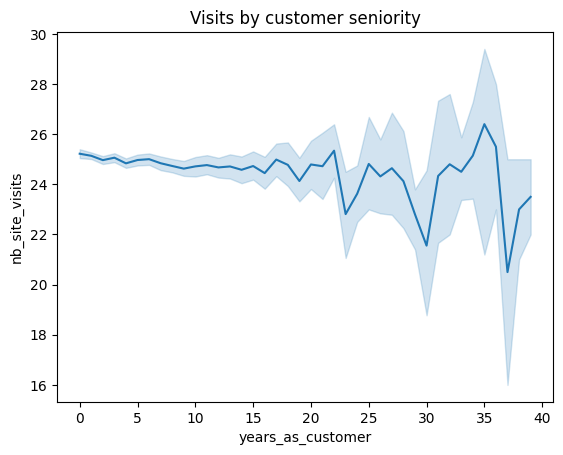

In [31]:
sns.lineplot(data = df , y= 'nb_site_visits', x = 'years_as_customer')
plt.title('Visits by customer seniority')
plt.show()

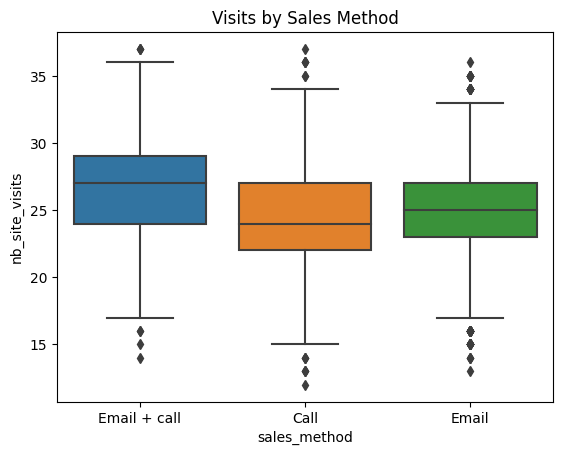

In [32]:
sns.boxplot(data = df , x= 'sales_method', y = 'nb_site_visits')
plt.title('Visits by Sales Method')
plt.show()

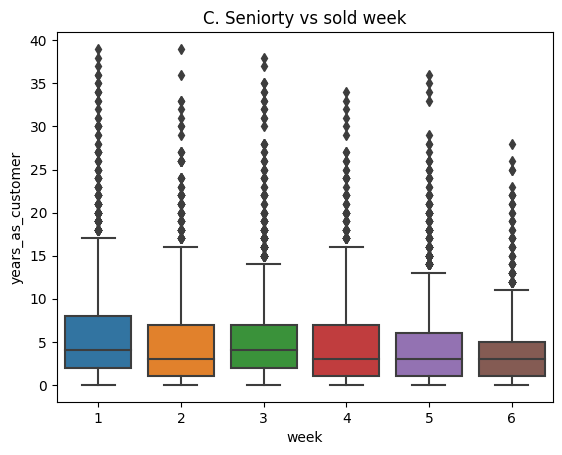

In [33]:
sns.boxplot(data = df , x= 'week', y = 'years_as_customer')
plt.title('C. Seniorty vs sold week')
plt.show()

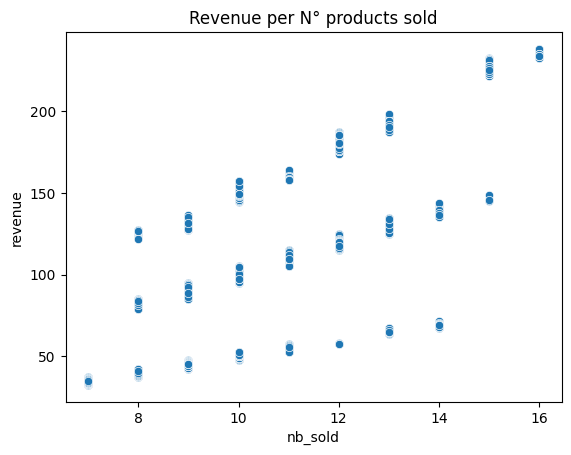

In [34]:
sns.scatterplot(data = df , y= 'revenue', x = 'nb_sold')
plt.title('Revenue per N° products sold')
plt.show()

## Business Metrics

Since the goal is to select the best approaches for sales strategy, by improving the revenue while lowering the effort put, I suggest to use the **overall ratio Revenue / Time.**

Based on the data provided, currently the overall ratio is 7.58 USD/min.  
The higher this value, the better the approach used on each new product sales strategy.

## Recommendations

In order to improve the business metric:
- I would recommend to focus on Email method, which is the most profitable strategy, and mix it with Email + call for getting 		higher revenues.
- I would strongly disadvice to use the Call only method. Due the way in which customers buy products are changing, revenue is 		low. Also requires much more effort than other methods, so the performance is poor.
- I would recommend to promote the website, due there is a positive correlation between website visits and revenue.

Recommendations about Data Collection for in-depth analysis:
   * Check for missing data on revenue column
   * Include more data about each new product sold, including their prices.



